# Loan Approval Prediction Description

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE

In [56]:
data = pd.read_csv("C:\\Users\\Abdel\\PycharmProjects\\Loan Approval Prediction Description\\loan_approval_dataset.csv")
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [57]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [58]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


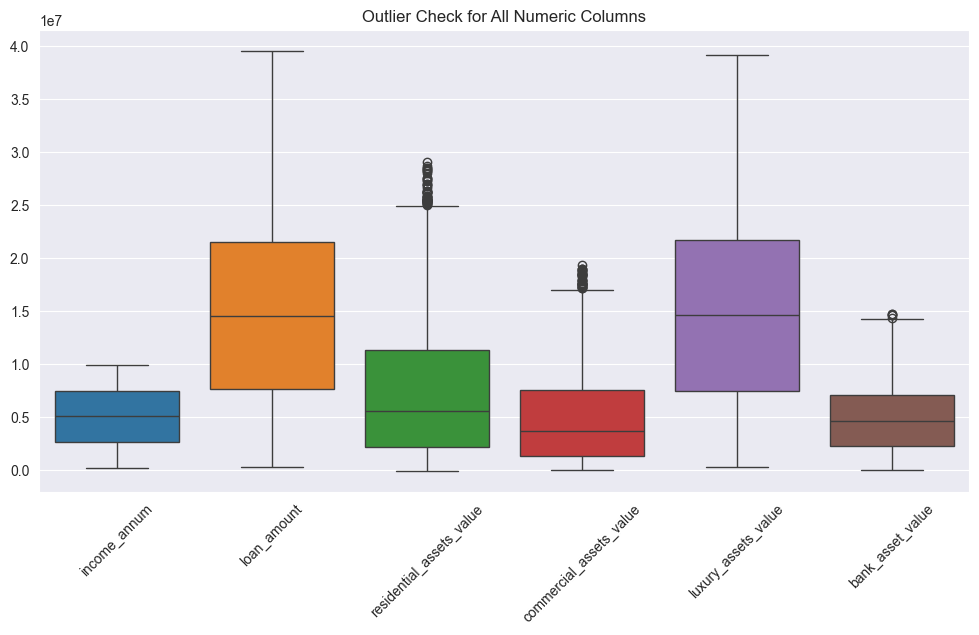

In [59]:
data.columns = data.columns.str.strip()
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
drop_cols = ['loan_id', 'no_of_dependents', 'loan_term', 'cibil_score']
numeric_cols = [col for col in numeric_cols if col not in drop_cols]
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_cols])
plt.xticks(rotation=45)
plt.title("Outlier Check for All Numeric Columns")
plt.show()

In [60]:
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

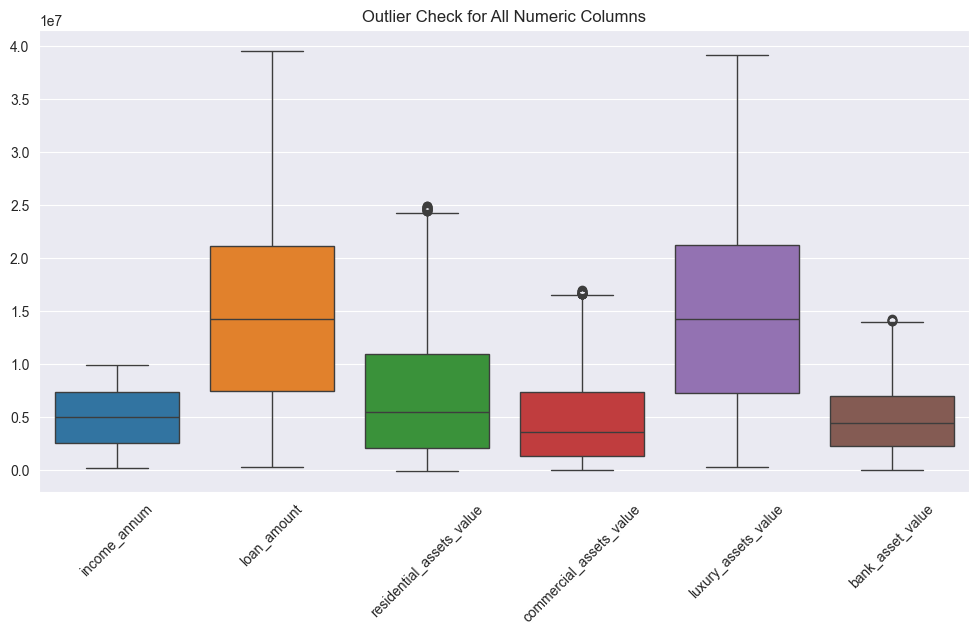

In [61]:
data.columns = data.columns.str.strip()
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
drop_cols = ['loan_id', 'no_of_dependents', 'loan_term', 'cibil_score']
numeric_cols = [col for col in numeric_cols if col not in drop_cols]
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_cols])
plt.xticks(rotation=45)
plt.title("Outlier Check for All Numeric Columns")
plt.show()

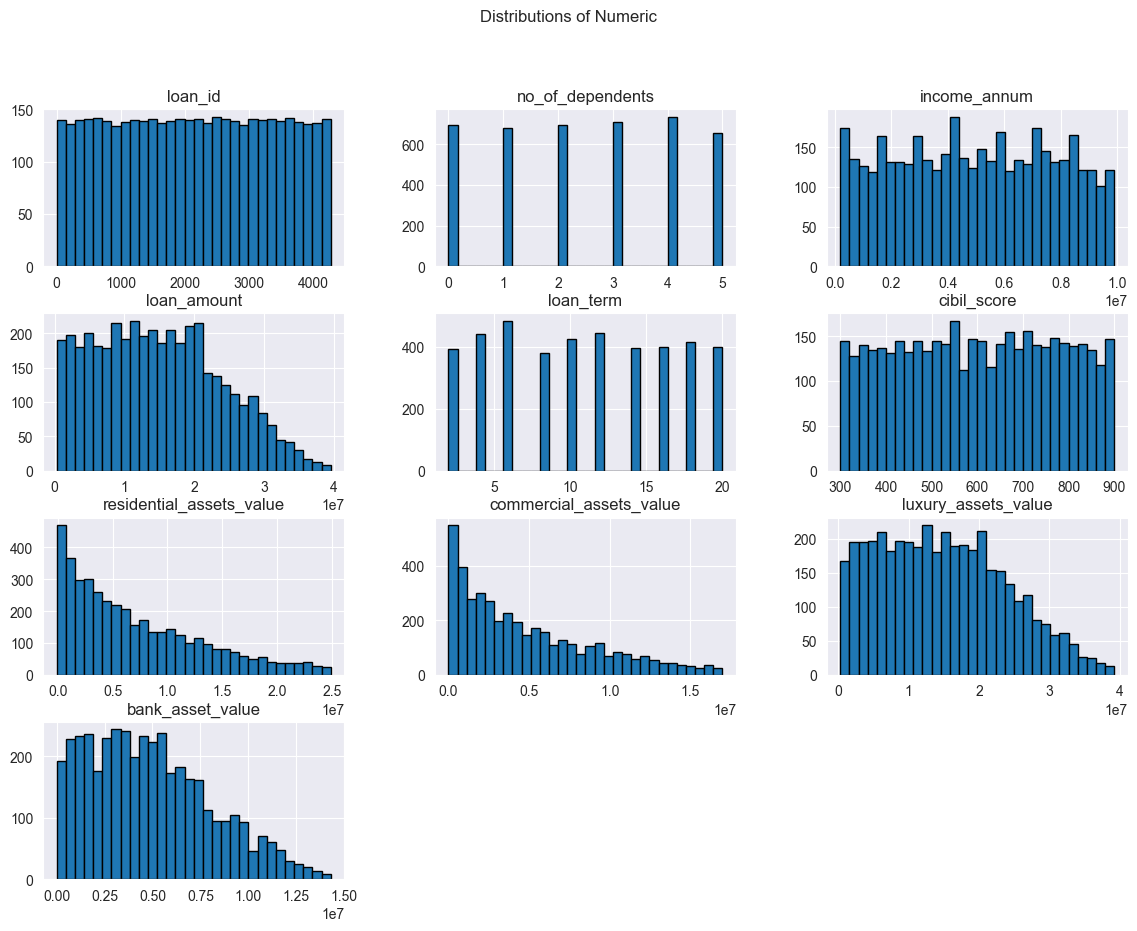

In [62]:
numeric_cols = data.select_dtypes(include=['int64','float64']).columns
data[numeric_cols].hist(figsize=(14,10), bins=30, edgecolor='black')
plt.suptitle("Distributions of Numeric")
plt.show()

In [63]:
def label_encode_dataframe(df):
    df_encoded = df.copy()
    le = LabelEncoder()
    for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])
    return df_encoded

In [64]:
encoded = label_encode_dataframe(data)
print(encoded)

      loan_id  no_of_dependents  education  self_employed  income_annum  \
1           2                 0          1              1       4100000   
2           3                 3          0              0       9100000   
3           4                 3          0              0       8200000   
4           5                 5          1              1       9800000   
5           6                 0          0              1       4800000   
...       ...               ...        ...            ...           ...   
4264     4265                 5          0              1       1000000   
4265     4266                 0          1              1       3300000   
4266     4267                 2          1              0       6500000   
4267     4268                 1          1              0       4100000   
4268     4269                 1          0              0       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
1        12200000          8

In [65]:
X = encoded.drop('loan_status', axis=1)  
y = encoded['loan_status']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [67]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_res))

Before SMOTE: [2082 1260]
After SMOTE: [2082 2082]


In [68]:
clf = RandomForestClassifier(
    class_weight="balanced", random_state=42, n_estimators=200)
clf.fit(X_train_res, y_train_res)
print(clf)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)


In [69]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [70]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

Confusion Matrix:
 [[506  15]
 [  8 307]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       521
           1       0.95      0.97      0.96       315

    accuracy                           0.97       836
   macro avg       0.97      0.97      0.97       836
weighted avg       0.97      0.97      0.97       836

ROC-AUC: 0.9961459951863022


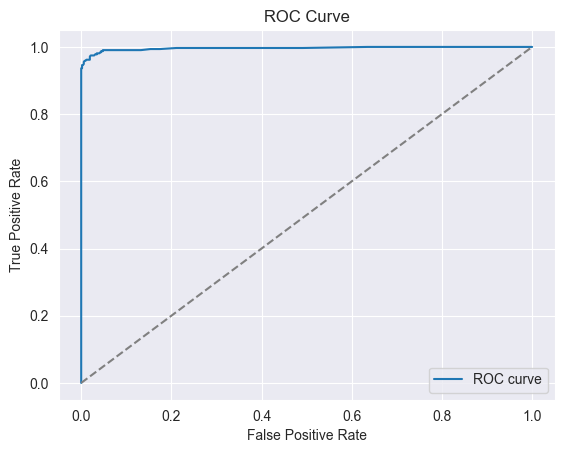

In [71]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

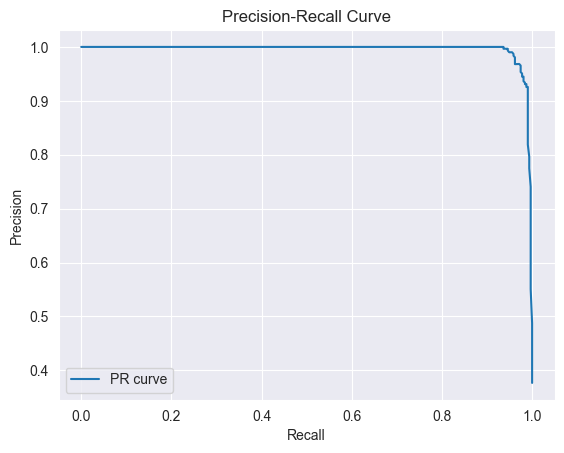

In [72]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(rec, prec, label="PR curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()